<a href="https://colab.research.google.com/github/mwrdi0804/Portofolio_Pacmann_1/blob/main/PREP_INTERN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1 Membaca Data

In [ ]:
import pandas as pd

# Coba cek data Group by UK apakah Invoice date Uniqe atau tidak

# Direct download link for the Google Drive file
path = 'https://drive.google.com/uc?id=18skRBb09FGQpV2VqKmh3VH-0vHMWSA5c'

# Read the CSV file with the specified encoding
df = pd.read_csv(path, encoding='ISO-8859-1')

# Show the first few rows of the data to check if it loaded correctly
print(df.head())
# print(df["InvoiceDate"].head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

    InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/10 8:26       2.55     17850.0  United Kingdom  
1  12/1/10 8:26       3.39     17850.0  United Kingdom  
2  12/1/10 8:26       2.75     17850.0  United Kingdom  
3  12/1/10 8:26       3.39     17850.0  United Kingdom  
4  12/1/10 8:26       3.39     17850.0  United Kingdom  


In [ ]:
# Menghapus baris dengan Quantity bernilai negatif
df = df[df['Quantity'] >= 0]

# Mengecek apakah masih ada data negatif
print(df[df['Quantity'] < 0])  # Harusnya tidak ada output

# Menghitung jumlah data negatif (harusnya 0)
jumlah_negatif = df[df['Quantity'] < 0].shape[0]
print(f'Jumlah baris dengan Quantity negatif: {jumlah_negatif}')

# Mengecek apakah semua data sudah positif atau nol
if (df['Quantity'] >= 0).all():
    print("Semua data Quantity sudah positif atau nol.")
else:
    print("Masih ada data Quantity yang negatif.")

# print(df["InvoiceDate"].head())

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []
Jumlah baris dengan Quantity negatif: 0
Semua data Quantity sudah positif atau nol.


In [ ]:
# Mengisi CustomerID yang hilang dengan 'Unknown'
df['CustomerID'] = df['CustomerID'].fillna('Unknown')

# Menghitung jumlah nilai kosong di setiap kolom
jumlah_kosong = df.isnull().sum()

# Menampilkan hasil
print(jumlah_kosong)
# print(df["InvoiceDate"].head())

InvoiceNo        0
StockCode        0
Description    592
Quantity         0
InvoiceDate      0
UnitPrice        0
CustomerID       0
Country          0
dtype: int64


In [ ]:
# Mengonversi InvoiceDate menjadi datetime dengan memperbolehkan format lebih fleksibel
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], dayfirst=True, errors='coerce')

# Buat kolom terpisah untuk tanggal dan waktu
df['Date'] = df['InvoiceDate'].dt.date  # Mengambil bagian tanggal
df['Time'] = df['InvoiceDate'].dt.strftime('%H:%M')  # Mengambil bagian waktu

# Hitung Revenue
df['Revenue'] = df['Quantity'] * df['UnitPrice']  # Mengalikan Quantity dan UnitPrice

# Tampilkan DataFrame yang telah diperbarui
print(df.tail())

<ipython-input-4-0a741e5a97d2>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], dayfirst=True, errors='coerce')


       InvoiceNo StockCode                      Description  Quantity  \
541904    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138    BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice CustomerID Country        Date   Time  \
541904 2011-09-12 12:50:00       0.85    12680.0  France  2011-09-12  12:50   
541905 2011-09-12 12:50:00       2.10    12680.0  France  2011-09-12  12:50   
541906 2011-09-12 12:50:00       4.15    12680.0  France  2011-09-12  12:50   
541907 2011-09-12 12:50:00       4.15    12680.0  France  2011-09-12  12:50   
541908 2011-09-12 12:50:00       4.95    12680.0  France  2011-09-12  12:50   

        Revenue  
541904    10.20  
541905    12.60  
541906    16.60  
541907    16.6

<ipython-input-5-85194fad7eb1>:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_monthly, x='MonthYear', y='Revenue', marker='o', ci=None)


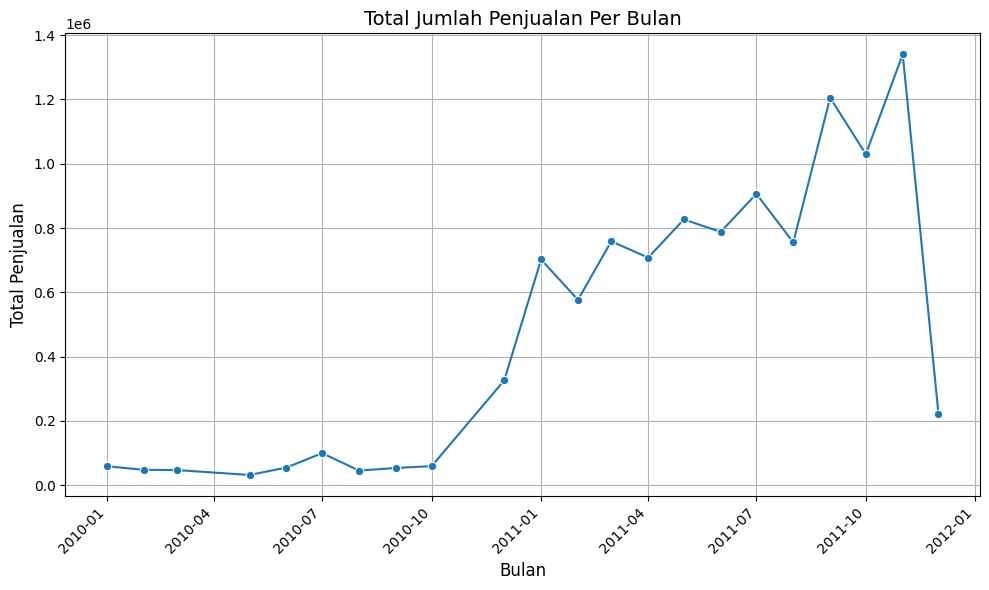

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ubah kolom 'InvoiceDate' menjadi datetime (karena 'Date' sepertinya tidak ada)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Mengelompokkan data berdasarkan bulan dan tahun, menghitung total Revenue per bulan
df['MonthYear'] = df['InvoiceDate'].dt.to_period('M')
df_monthly = df.groupby('MonthYear')['Revenue'].sum().reset_index()

# Mengonversi 'MonthYear' menjadi datetime agar bisa dipakai sebagai sumbu X
df_monthly['MonthYear'] = df_monthly['MonthYear'].dt.to_timestamp()

# Membuat plot time series
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_monthly, x='MonthYear', y='Revenue', marker='o', ci=None)

# Menambahkan label dan judul
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Total Penjualan', fontsize=12)
plt.title('Total Jumlah Penjualan Per Bulan', fontsize=14)

# Memutar label pada sumbu X agar lebih rapi
plt.xticks(rotation=45, ha='right')

# Menambahkan grid
plt.grid(True)

# Menampilkan plot
plt.tight_layout()
plt.show()


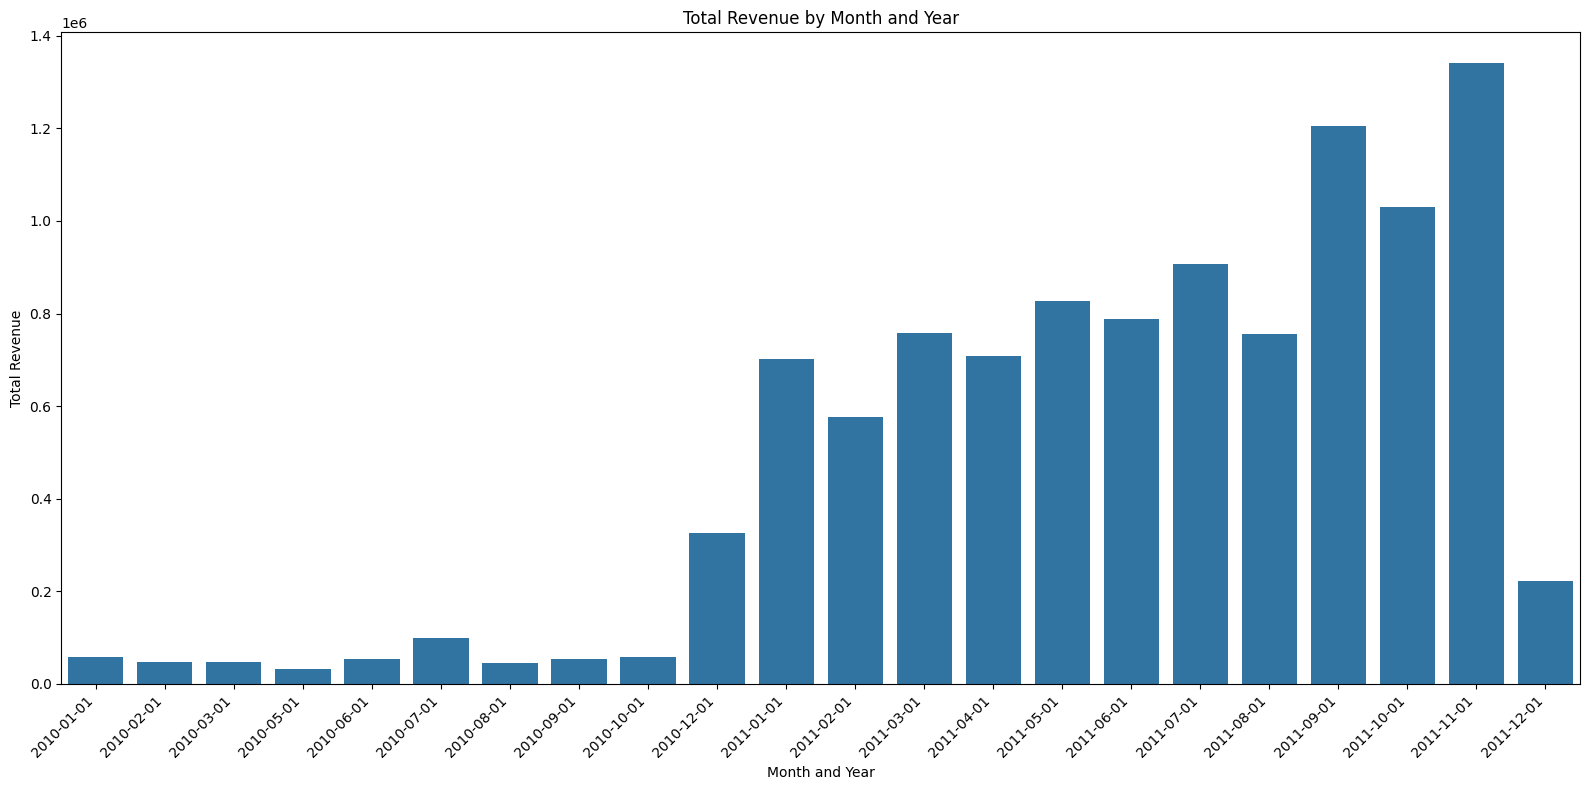

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by Month and Year, and menghitung total revenue
df['MonthYear'] = df['InvoiceDate'].dt.to_period('M')  # Mengambil bulan dan tahun
df_grouped = df.groupby('MonthYear')['Revenue'].sum().reset_index()

# Mengubah periode ke datetime untuk format yang lebih sesuai
df_grouped['MonthYear'] = df_grouped['MonthYear'].dt.to_timestamp()

# Membuat Barchart
plt.figure(figsize=(16, 8))  # Lebarkan ukuran grafik
sns.barplot(data=df_grouped,
            x='MonthYear',
            y='Revenue',
            errorbar=None)

# Menambahkan label
plt.xlabel('Month and Year')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Month and Year')

plt.xticks(rotation=45, ha='right')  # Memutar label bulan dan tahun agar lebih mudah dibaca

plt.tight_layout()
plt.show()


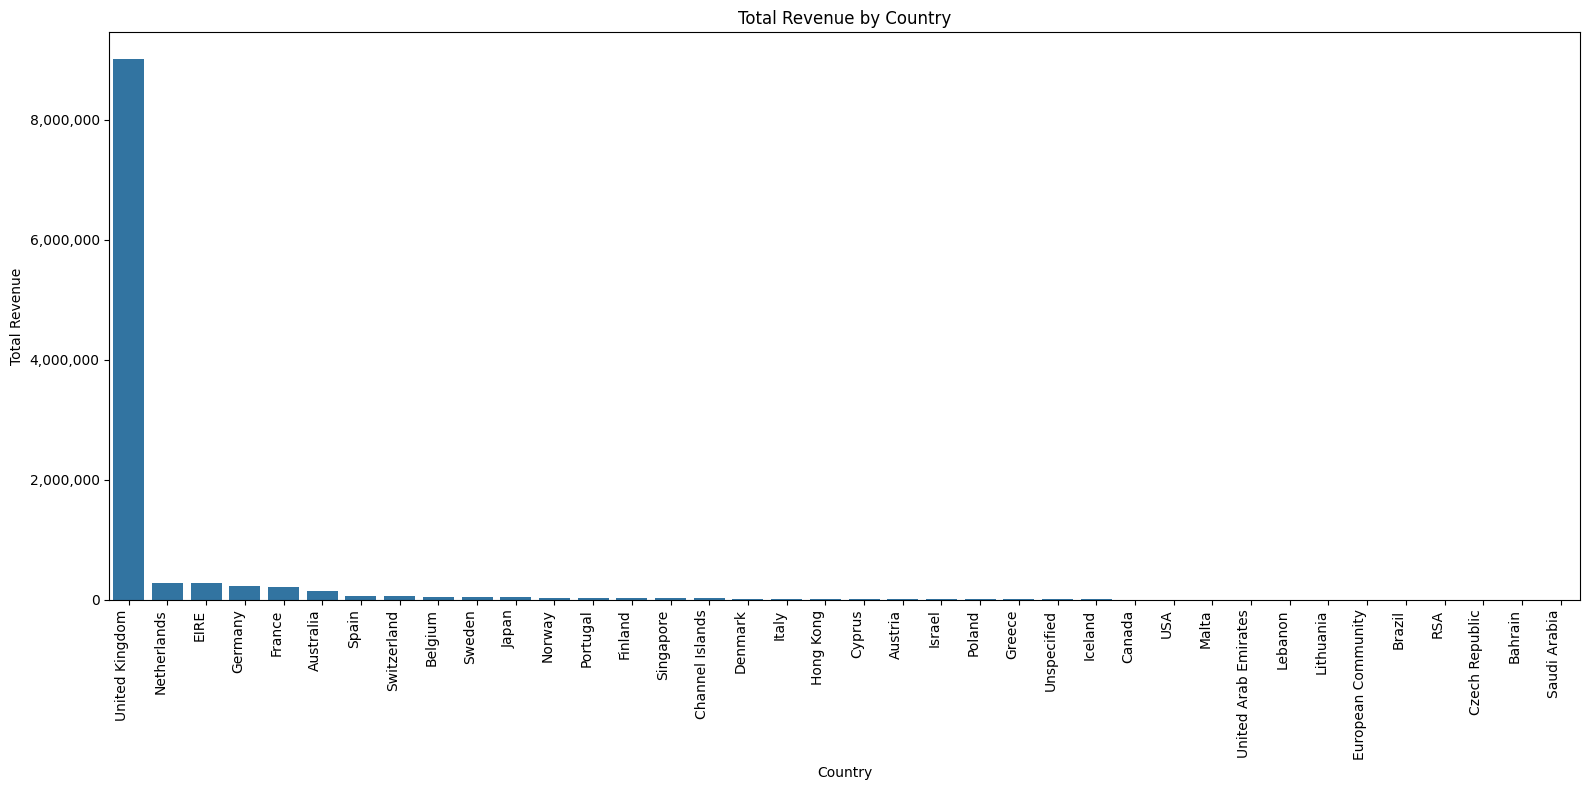

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Group by Country menghitung revenue berdasarkan Country
df_grouped_country = df.groupby('Country')['Revenue'].sum().reset_index()

# Sorting data dari urutan terbesar
df_grouped_country = df_grouped_country.sort_values(by='Revenue', ascending=False)

# membuat barchart
plt.figure(figsize=(16, 8))  # Ukuran grafik diperlebar
sns.barplot(data=df_grouped_country,
            x='Country',
            y='Revenue',
            errorbar=None)

plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Country')

# Memutar nama negara agar lebih mudah dibaca
plt.xticks(rotation=90, ha='right')

# Format sumbu Y agar menggunakan pemisah ribuan
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()
plt.show()

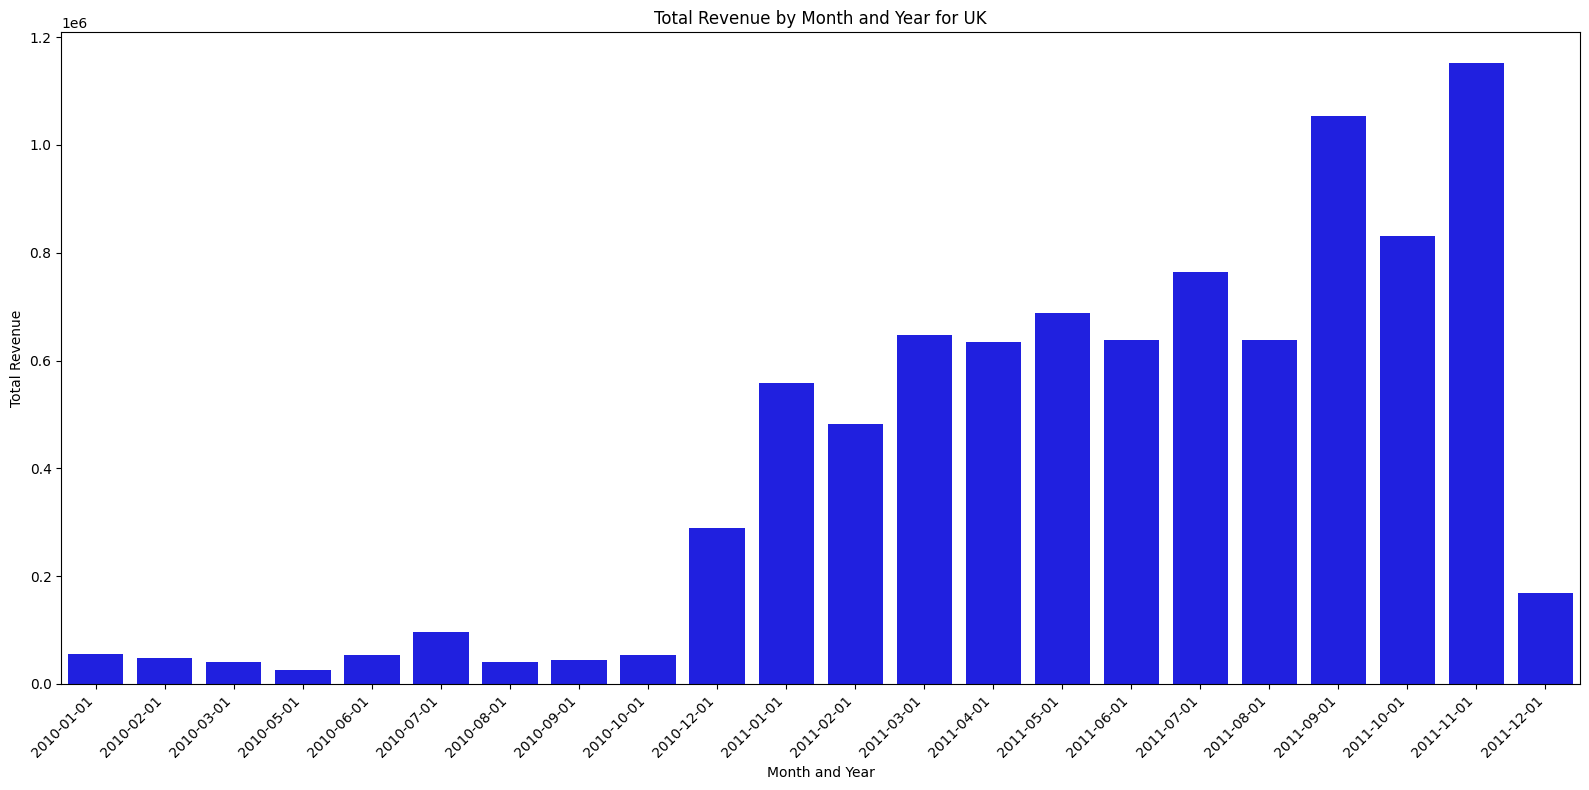

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Filter data untuk negara 'United Kingdom'
df_uk = df[df['Country'] == 'United Kingdom'].copy()

# Mengubah kolom 'InvoiceDate' menjadi datetime jika belum
df_uk['InvoiceDate'] = pd.to_datetime(df_uk['InvoiceDate'], dayfirst=True, errors='coerce')

# Membuat kolom 'Revenue' dengan mengalikan Quantity dan UnitPrice
df_uk['Revenue'] = df_uk['Quantity'] * df_uk['UnitPrice']

# Membuat kolom 'MonthYear' untuk menyimpan informasi bulan dan tahun dari 'InvoiceDate'
df_uk['MonthYear'] = df_uk['InvoiceDate'].dt.to_period('M')  # Mengambil hanya bulan dan tahun

# Mengelompokkan data berdasarkan 'MonthYear' dan menghitung total revenue per bulan
df_grouped = df_uk.groupby('MonthYear')['Revenue'].sum().reset_index()

# Mengubah kolom 'MonthYear' menjadi format timestamp agar tampilannya rapi
df_grouped['MonthYear'] = df_grouped['MonthYear'].dt.to_timestamp()

# Membuat barplot untuk menampilkan total revenue per bulan
plt.figure(figsize=(16, 8))  # Mengatur ukuran grafik agar lebih lebar
sns.barplot(data=df_grouped, x='MonthYear', y='Revenue', color='blue', errorbar=None)

# Menambahkan label sumbu X, Y dan judul
plt.xlabel('Month and Year')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Month and Year for UK')

# Mengatur tampilan sumbu X agar bulan dan tahun mudah dibaca
plt.xticks(rotation=45, ha='right')  # Rotasi label pada sumbu X

# Menampilkan grafik
plt.tight_layout()  # Menyesuaikan layout agar lebih rapi
plt.show()

In [ ]:
import pandas as pd

# Filter data untuk United Kingdom (UK)
df_uk = df[df['Country'] == 'United Kingdom']

# Cek berapa banyak data yang kosong di setiap kolom
missing_values = df_uk.isnull().sum()

# Tampilkan hasil
print("Jumlah data yang kosong per kolom di dataset UK:")
print(missing_values)

Jumlah data yang kosong per kolom di dataset UK:
InvoiceNo        0
StockCode        0
Description    592
Quantity         0
InvoiceDate      0
UnitPrice        0
CustomerID       0
Country          0
Date             0
Time             0
Revenue          0
MonthYear        0
dtype: int64


In [ ]:
import pandas as pd

# Filter data hanya untuk UK dan buat salinan dari DataFrame
df_uk = df[df['Country'] == 'United Kingdom'].copy()

# Ganti CustomerID yang kosong dengan 'Unknown'
df_uk['CustomerID'].replace('', 'Unknown', inplace=True)

# Ubah CustomerID menjadi tipe string (karena ada 'Unknown')
df_uk['CustomerID'] = df_uk['CustomerID'].astype(str)

# Ubah InvoiceDate menjadi tipe datetime
df_uk['InvoiceDate'] = pd.to_datetime(df_uk['InvoiceDate'])

# Hitung Revenue dengan mengalikan Quantity dan UnitPrice
df_uk['Revenue'] = df_uk['Quantity'] * df_uk['UnitPrice']

# Tentukan tanggal referensi (tanggal terakhir pada data)
reference_date = df_uk['InvoiceDate'].max()

# Group by CustomerID untuk menghitung RFM
rfm_uk = df_uk.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency
    'Revenue': 'sum'  # Monetary
}).reset_index()

# Ubah nama kolom untuk RFM dan tambahkan unit dalam kurung
rfm_uk.columns = ['CustomerID', 'Recency (hari)', 'Frequency (jumlah)', 'Monetary ($)']

# Tampilkan data RFM
print(rfm_uk.head())  # Menampilkan 5 baris pertama dari DataFrame RFM

  CustomerID  Recency (hari)  Frequency (jumlah)  Monetary ($)
0    12346.0             326                   1      77183.60
1    12747.0              23                  11       4196.01
2    12748.0               4                 210      33719.73
3    12749.0              23                   5       4090.88
4    12820.0              45                   4        942.34


Kolom 'Country' tidak ditemukan dalam DataFrame
Jumlah nilai Null:
CustomerID            0
Recency (hari)        0
Frequency (jumlah)    0
Monetary ($)          0
dtype: int64

Tipe Data:
CustomerID             object
Recency (hari)          int64
Frequency (jumlah)      int64
Monetary ($)          float64
dtype: object

Nilai tidak valid:
Empty DataFrame
Columns: [CustomerID, Recency (hari), Frequency (jumlah), Monetary ($)]
Index: []

Statistik Deskriptif:
       Recency (hari)  Frequency (jumlah)  Monetary ($)
count     3922.000000         3922.000000  3.922000e+03
mean       105.527282            4.789903  2.295537e+03
std        115.035084           34.809266  2.804714e+04
min          0.000000            1.000000  0.000000e+00
25%         22.000000            1.000000  3.001200e+02
50%         61.000000            2.000000  6.522800e+02
75%        162.000000            5.000000  1.577975e+03
max        697.000000         2137.000000  1.694706e+06


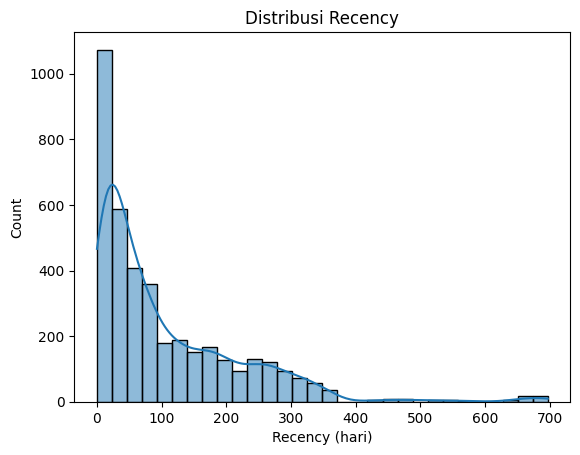

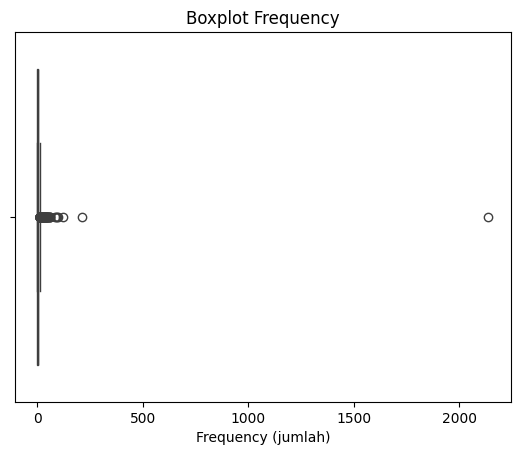

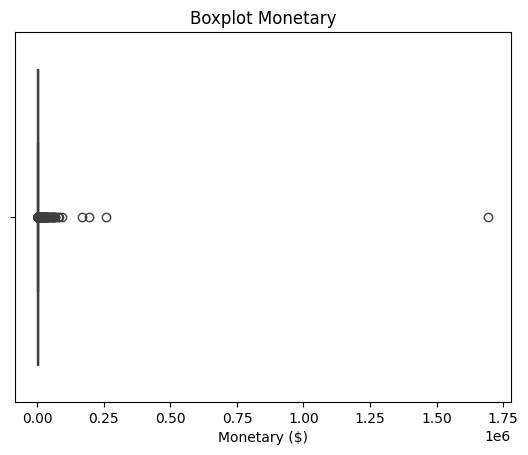


Persentase Setiap Segmen Pelanggan di UK:
Segment
Churn                  36.243180
At Risk Customer       27.773448
New Customer           20.394908
High Value Customer    15.588465
Name: count, dtype: float64
  CustomerID  Recency (hari)  Frequency (jumlah)  Monetary ($)  \
0    12346.0             326                   1      77183.60   
1    12747.0              23                  11       4196.01   
3    12749.0              23                   5       4090.88   
4    12820.0              45                   4        942.34   
5    12821.0              96                   1         92.72   

               Segment  
0         New Customer  
1  High Value Customer  
3  High Value Customer  
4     At Risk Customer  
5         New Customer  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Cek apakah kolom 'Country' ada dalam DataFrame
if 'Country' in rfm_uk.columns:
    # Memfilter data hanya untuk negara UK
    rfm_uk = rfm_uk[rfm_uk['Country'] == 'United Kingdom']
else:
    print("Kolom 'Country' tidak ditemukan dalam DataFrame")

# Periksa nilai Null / NaN
print("Jumlah nilai Null:")
print(rfm_uk.isnull().sum())

# Validasi Tipe Data
print("\nTipe Data:")
print(rfm_uk.dtypes)

# Cek Rentang Nilai
invalid_values = rfm_uk[(rfm_uk['Recency (hari)'] < 0) | (rfm_uk['Frequency (jumlah)'] < 0) | (rfm_uk['Monetary ($)'] < 0)]
print("\nNilai tidak valid:")
print(invalid_values)

# Statistik Deskriptif
print("\nStatistik Deskriptif:")
print(rfm_uk[['Recency (hari)', 'Frequency (jumlah)', 'Monetary ($)']].describe())

# Visualisasi Distribusi
sns.histplot(rfm_uk['Recency (hari)'], bins=30, kde=True)
plt.title('Distribusi Recency')
plt.show()

sns.boxplot(x='Frequency (jumlah)', data=rfm_uk)
plt.title('Boxplot Frequency')
plt.show()

sns.boxplot(x='Monetary ($)', data=rfm_uk)
plt.title('Boxplot Monetary')
plt.show()

# Identifikasi Outlier menggunakan Z-Score (menghapus outlier dengan Z-Score > 3 atau < -3)
rfm_uk = rfm_uk[(np.abs(stats.zscore(rfm_uk[['Recency (hari)', 'Frequency (jumlah)', 'Monetary ($)']])) < 3).all(axis=1)]

# Fungsi Segmentasi RFM
def rfm_segmentation(rfm):
    if rfm['Recency (hari)'] <= 30 and rfm['Frequency (jumlah)'] >= 5 and rfm['Monetary ($)'] > 1000:
        return 'High Value Customer'
    elif rfm['Recency (hari)'] > 30 and rfm['Recency (hari)'] <= 90:
        return 'At Risk Customer'
    elif rfm['Recency (hari)'] > 90 and rfm['Frequency (jumlah)'] == 1:
        return 'New Customer'
    else:
        return 'Churn'

# Terapkan Segmentasi dengan .loc[]
rfm_uk.loc[:, 'Segment'] = rfm_uk.apply(rfm_segmentation, axis=1)

# Hitung persentase dari setiap segmen
segment_counts_uk = rfm_uk['Segment'].value_counts()
segment_percentage_uk = (segment_counts_uk / len(rfm_uk)) * 100

# Tampilkan hasil persentase
print("\nPersentase Setiap Segmen Pelanggan di UK:")
print(segment_percentage_uk)

# Lihat Segmentasi
print(rfm_uk[['CustomerID', 'Recency (hari)', 'Frequency (jumlah)', 'Monetary ($)', 'Segment']].head())


In [ ]:
unique_segments = rfm_uk['Segment'].unique()
print(unique_segments)

['New Customer' 'High Value Customer' 'At Risk Customer' 'Churn']


In [ ]:
# Hitung jumlah pelanggan per segmen
segment_counts = rfm_uk['Segment'].value_counts()

# Hitung persentase dari setiap segmen
segment_percentage = (segment_counts / len(rfm_uk)) * 100

# Gabungkan jumlah dan persentase ke dalam satu DataFrame
segment_summary = pd.DataFrame({
    'Jumlah Pelanggan': segment_counts,
    'Persentase (%)': segment_percentage
})

# Tampilkan hasil
print("Jumlah dan Persentase Pelanggan di Setiap Segmen:")
print(segment_summary)

Jumlah dan Persentase Pelanggan di Setiap Segmen:
                     Jumlah Pelanggan  Persentase (%)
Segment                                              
Churn                            1395       36.243180
At Risk Customer                 1069       27.773448
New Customer                      785       20.394908
High Value Customer               600       15.588465


<ipython-input-14-768f7471852c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_summary.index, y=segment_summary['Jumlah Pelanggan'], palette='Set2')


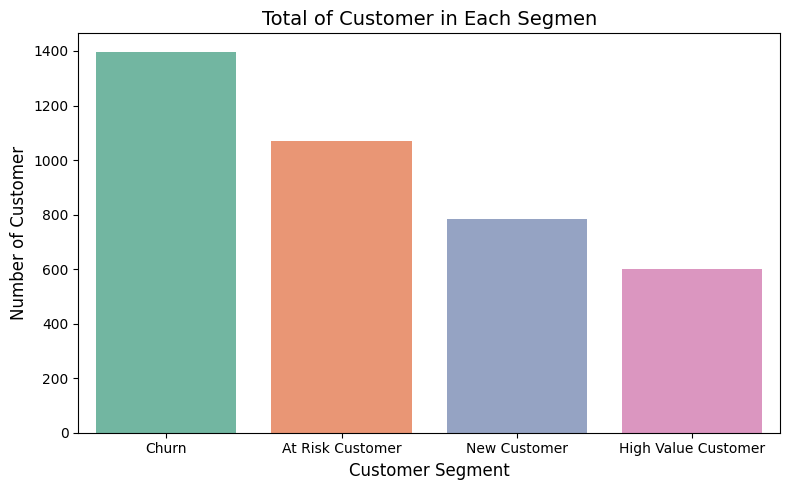

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat barplot untuk jumlah pelanggan per segmen
plt.figure(figsize=(8, 5))
sns.barplot(x=segment_summary.index, y=segment_summary['Jumlah Pelanggan'], palette='Set2')

# Menambahkan judul dan label pada sumbu
plt.title('Total of Customer in Each Segmen', fontsize=14)
plt.xlabel('Customer Segment', fontsize=12)
plt.ylabel('Number of Customer', fontsize=12)

# Menampilkan plot
plt.tight_layout()
plt.show()


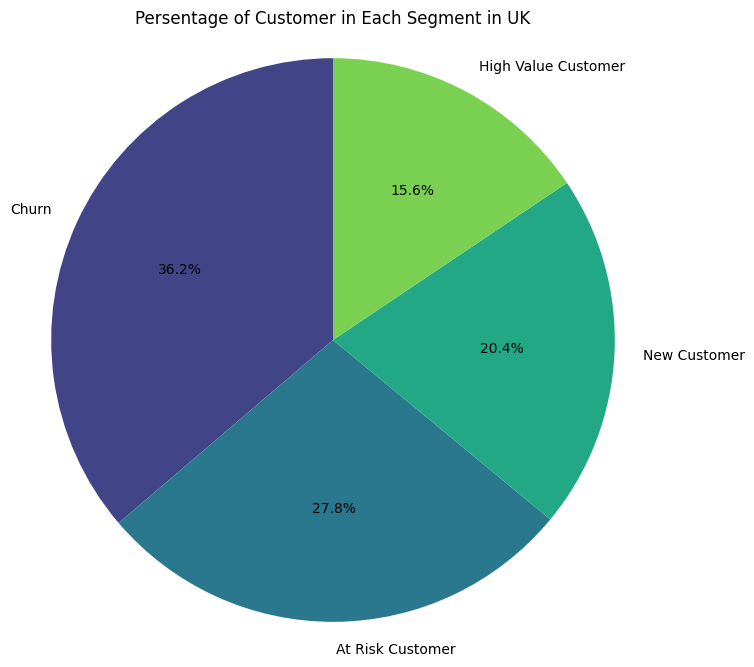

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data segmentasi (contohnya)
segment_percentage = rfm_uk['Segment'].value_counts(normalize=True) * 100

# Buat pie chart menggunakan Matplotlib
plt.figure(figsize=(8, 8))
plt.pie(segment_percentage.values, labels=segment_percentage.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(segment_percentage)))
plt.title('Persentage of Customer in Each Segment in UK')
plt.axis('equal')  # Membuat pie chart berbentuk lingkaran
plt.show()

In [ ]:
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice CustomerID         Country        Date  \
0 2010-01-12 08:26:00       2.55    17850.0  United Kingdom  2010-01-12   
1 2010-01-12 08:26:00       3.39    17850.0  United Kingdom  2010-01-12   
2 2010-01-12 08:26:00       2.75    17850.0  United Kingdom  2010-01-12   
3 2010-01-12 08:26:00       3.39    17850.0  United Kingdom  2010-01-12   
4 2010-01-12 08:26:00       3.39    17850.0  United Kingdom  2010-01-12   

    Time  Revenue MonthYear  
0  08:26    15.30   2010-01  
1  08:26    20.34   2010-01  
2  08:26    22.00   2010-0

In [ ]:
# Mengonversi kolom 'Time' menjadi datetime
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M', errors='coerce')

# Memeriksa tipe data setiap kolom dalam DataFrame
print(df.dtypes)

# Memeriksa nilai yang hilang
print(df.isnull().sum())


InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
Date                   object
Time           datetime64[ns]
Revenue               float64
MonthYear           period[M]
dtype: object
InvoiceNo        0
StockCode        0
Description    592
Quantity         0
InvoiceDate      0
UnitPrice        0
CustomerID       0
Country          0
Date             0
Time             0
Revenue          0
MonthYear        0
dtype: int64


Jumlah baris untuk negara UK: 486286
Jumlah baris setelah pemfilteran revenue: 462275
Jumlah baris total revenue per StockCode: 3924


<ipython-input-29-7b43ef0b9d85>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Hour'] = filtered_df['InvoiceDate'].dt.hour


Jumlah baris setelah memfilter 5 StockCode teratas: 6970
Jumlah baris untuk Revenue per jam dan StockCode: 66


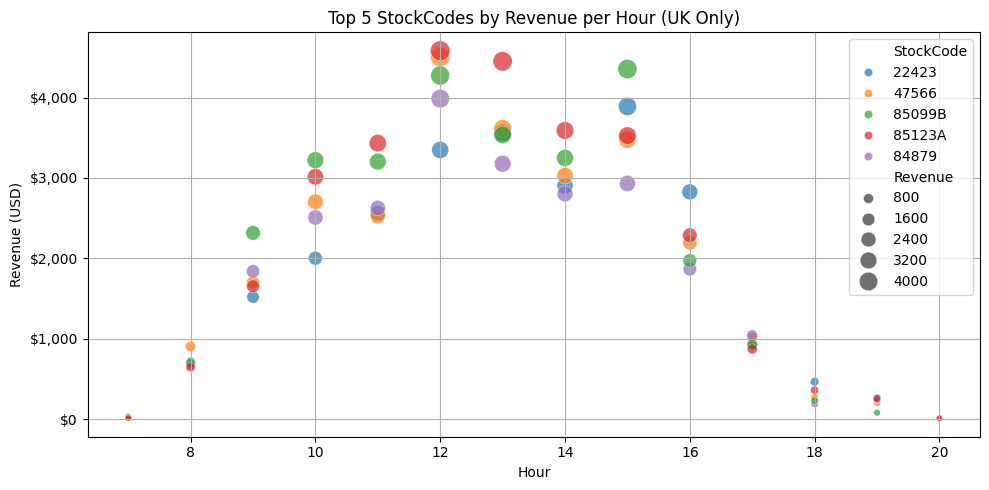

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Memfilter data hanya untuk negara UK
df_uk = df[df['Country'] == 'United Kingdom']

# Menampilkan jumlah baris untuk data dari UK
print(f"Jumlah baris untuk negara UK: {len(df_uk)}")

# Menentukan batas atas untuk Revenue (95%)
threshold = df_uk['Revenue'].quantile(0.95)
filtered_df = df_uk[df_uk['Revenue'] <= threshold]

# Menampilkan jumlah baris setelah pemfilteran berdasarkan revenue
print(f"Jumlah baris setelah pemfilteran revenue: {len(filtered_df)}")

# Menambahkan kolom 'Hour' untuk memisahkan data berdasarkan jam transaksi
filtered_df['Hour'] = filtered_df['InvoiceDate'].dt.hour

# Menghitung total Revenue per StockCode
total_revenue_per_stockcode = filtered_df.groupby('StockCode')['Revenue'].sum().reset_index()

# Menampilkan jumlah baris untuk total revenue per StockCode
print(f"Jumlah baris total revenue per StockCode: {len(total_revenue_per_stockcode)}")

# Mengambil 5 StockCode dengan Revenue tertinggi
top_5_stockcodes = total_revenue_per_stockcode.nlargest(5, 'Revenue')['StockCode']

# Memfilter hanya untuk 5 StockCode tersebut
filtered_top_df = filtered_df[filtered_df['StockCode'].isin(top_5_stockcodes)]

# Menampilkan jumlah baris setelah memfilter hanya untuk 5 StockCode teratas
print(f"Jumlah baris setelah memfilter 5 StockCode teratas: {len(filtered_top_df)}")

# Menghitung Revenue per jam untuk 5 StockCode tersebut
revenue_per_hour_top_5 = filtered_top_df.groupby(['Hour', 'StockCode'])['Revenue'].sum().reset_index()

# Menampilkan jumlah baris untuk revenue per jam dan StockCode
print(f"Jumlah baris untuk Revenue per jam dan StockCode: {len(revenue_per_hour_top_5)}")

# Membuat scatterplot sederhana
plt.figure(figsize=(10, 5))
sns.scatterplot(data=revenue_per_hour_top_5, x='Hour', y='Revenue', hue='StockCode', size='Revenue', sizes=(20, 200), alpha=0.7)

# Menambahkan judul dan label sumbu
plt.title('Top 5 StockCodes by Revenue per Hour (UK Only)')
plt.xlabel('Hour')
plt.ylabel('Revenue (USD)')
plt.grid(True)

# Mengatur format sumbu Y menjadi format USD
def currency_formatter(x, pos):
    return f'${int(x):,}'  # Format angka sebagai mata uang USD

plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_formatter))

# Menampilkan plot
plt.tight_layout()
plt.show()


In [ ]:
# Memfilter data hanya untuk negara UK
df_uk = df[df['Country'] == 'United Kingdom']

# Menampilkan jumlah baris untuk data dari UK
print(f"Jumlah baris untuk negara UK: {df_uk.shape[0]}")  # Menampilkan jumlah baris

Jumlah baris untuk negara UK: 486286
